In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Reading datafiles
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
merged_df = ride_df.merge(city_df, how='left' ,left_on='city', right_on='city')

# Display the data table for preview
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# Obtain the x and y coordinates for each of the three city types

# unique_df = merged_df.groupby('city')


# Rural Dataframe and calculations
rural_df = merged_df[merged_df['type']=='Rural']

rural_avg = rural_df.groupby(['city'])['fare'].mean()
rural_rides = rural_df.groupby(['city']).count()['ride_id']
rural_drivers = rural_df.groupby(['city'])['driver_count'].mean()

# Suburban dataframe and calculations
sub_df = merged_df[merged_df['type']=='Suburban']

sub_avg = sub_df.groupby(['city'])['fare'].mean()
sub_rides = sub_df.groupby(['city']).count()['ride_id']
sub_drivers = sub_df.groupby(['city'])['driver_count'].mean()

# Urban datafarame and calculations
urban_df = merged_df[merged_df['type']=='Urban']

urban_avg = urban_df.groupby(['city'])['fare'].mean()
urban_rides = urban_df.groupby(['city']).count()['ride_id']
urban_drivers = urban_df.groupby(['city'])['driver_count'].mean()

# COLOR SCHEME
    # URBAN IS CORAL
    # SUBURBAN IS SKYBLUE
    # RURAL IS GOLD



## Bubble Plot of Ride Sharing Data

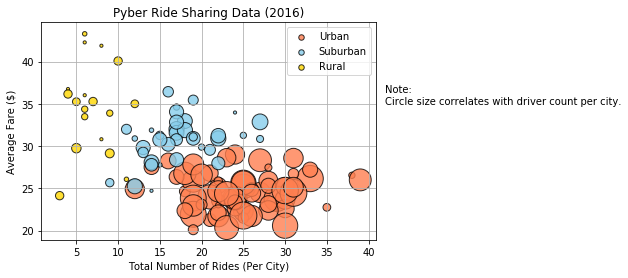

In [3]:

# Build the scatter plots for each city types
plt.scatter(x = urban_rides,y = urban_avg, s = (urban_drivers*10), marker  =  'o', facecolors = 'coral',
            edgecolors = 'black',alpha  =  0.8, label = "Urban")
plt.scatter(x = sub_rides,y = sub_avg,s = (sub_drivers*10), marker  = 'o', facecolors  = "skyblue",
            edgecolors = 'black',alpha  =  0.8, label = "Suburban")
plt.scatter(x = rural_rides,y = rural_avg,s = (rural_drivers*10),marker  = 'o', facecolors  = "gold",
            edgecolors = 'black',alpha  =  0.8, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
scatterlegend = plt.legend(loc = "upper right")

scatterlegend.legendHandles[0]._sizes = [30]
scatterlegend.legendHandles[1]._sizes = [30]
scatterlegend.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: \nCircle size correlates with driver count per city.")

# Save Figure
plt.savefig('Images/PyberRideSharingData.png', bbox_inches = 'tight')

# Show plot
plt.show()

## Total Fares by City Type

In [4]:
type_df = merged_df.groupby('type')
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]

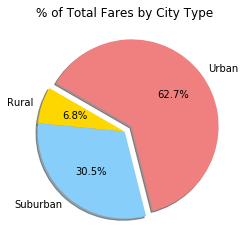

In [5]:
# Calculate Type Percents
total_fares = type_df['fare'].sum()

# Build Pie Chart
plt.title("% of Total Fares by City Type")
plt.pie(total_fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig('Images/PyberTotalFaresbyCityType.png', bbox_inches = 'tight')
plt.show()


## Total Rides by City Type

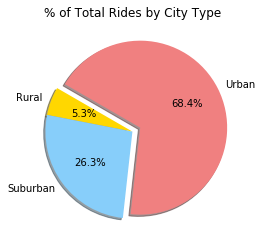

In [6]:
# Calculate Ride Percents
total_rides = type_df['type'].count()

# Build Pie Chart
plt.title("% of Total Rides by City Type")
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig('Images/PyberTotalRidesbyCityType.png', bbox_inches = 'tight')
plt.show()



## Total Drivers by City Type

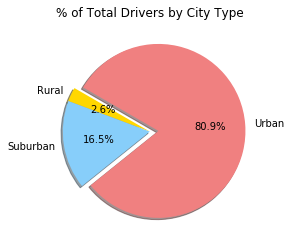

In [7]:
# Calculate Ride Percents
total_drivers = city_df.groupby(['type'])['driver_count'].sum()

# Build Pie Chart
plt.title("% of Total Drivers by City Type")
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)

# Save Figure
plt.savefig('Images/PyberTotalDriversbyCityType.png', bbox_inches = 'tight')
plt.show()